# **FINAL Project CNIT571: Bias Mitigation and Fairness in Income Prediction Models**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Data Preparation
**Load Income Dataset: ACSIncome Dataset**

In [2]:
# Load the dataset
data = pd.read_csv('/Users/darshil/Desktop/Fall2024/CNIT571/ACSIncome.csv') 
print(data.head())
print(data.info())


   AGEP  COW  SCHL  MAR    OCCP  POBP  RELP  WKHP  SEX  RAC1P   ST    PINCP
0  18.0  1.0  18.0  5.0  4720.0  13.0  17.0  21.0  2.0    2.0  1.0   1600.0
1  53.0  5.0  17.0  5.0  3605.0  18.0  16.0  40.0  1.0    1.0  1.0  10000.0
2  41.0  1.0  16.0  5.0  7330.0   1.0  17.0  40.0  1.0    1.0  1.0  24000.0
3  18.0  6.0  18.0  5.0  2722.0   1.0  17.0   2.0  2.0    1.0  1.0    180.0
4  21.0  5.0  19.0  5.0  3870.0  12.0  17.0  50.0  1.0    1.0  1.0  29000.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664500 entries, 0 to 1664499
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   AGEP    1664500 non-null  float64
 1   COW     1664500 non-null  float64
 2   SCHL    1664500 non-null  float64
 3   MAR     1664500 non-null  float64
 4   OCCP    1664500 non-null  float64
 5   POBP    1664500 non-null  float64
 6   RELP    1664500 non-null  float64
 7   WKHP    1664500 non-null  float64
 8   SEX     1664500 non-null  float64
 9

In [3]:
print(data.columns)

Index(['AGEP', 'COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'WKHP', 'SEX',
       'RAC1P', 'ST', 'PINCP'],
      dtype='object')


## Explaination of the columns: 
AGEP: Age as an integer from 0 to 9

COW: Class of worker

SCHL: Educational attainment (Level of Education recieved)

MAR: Marital status

OCCP: Occupation

POBP: Place of Birth

RELP: Relationship to householder

WKHP: Usual hours worked per week in the past 12 months. Values are an integer from 1 to 99.

SEX: Gender ( '1' is Male or '2' is Female)

RAC1P: Race

PINCP: Total annual income per person, denoted as an integer ranging from 104 to 1,423,000

**Cleaning and Pre-processing data**

In [4]:
# Check for missing values
print(data.isnull().sum())

AGEP     0
COW      0
SCHL     0
MAR      0
OCCP     0
POBP     0
RELP     0
WKHP     0
SEX      0
RAC1P    0
ST       0
PINCP    0
dtype: int64


**There are no missing values in this dataset, so we don't need drop the null values**

In [5]:
# Encode categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

In [6]:
# We will ensure that the target variable income (PINCP) is binary
data['PINCP'] = (data['PINCP'] > 50000).astype(int)

# Split into features and target
X = data.drop(columns=['PINCP'])
y = data['PINCP']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data: {X_train.shape}, Test data: {X_test.shape}") 

Training data: (1331600, 11), Test data: (332900, 11)


## Exploratory Data Analysis

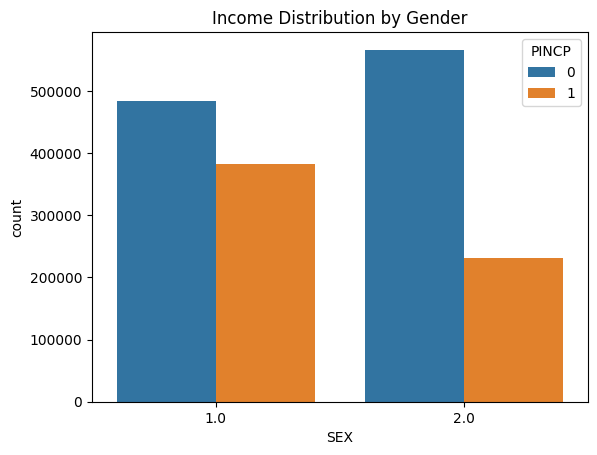

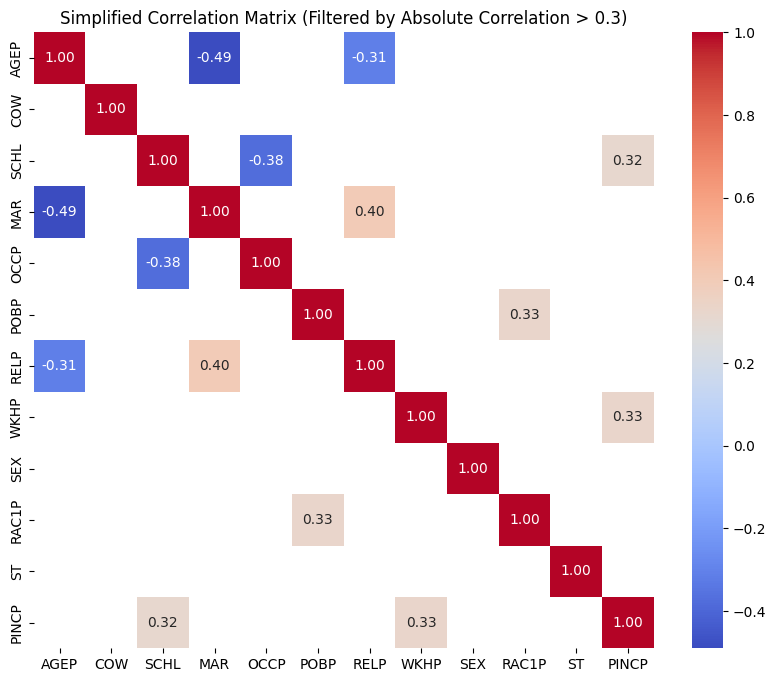

In [7]:
# Visualize distribution

sns.countplot(data=data, x='SEX', hue='PINCP')
plt.title('Income Distribution by Gender')
plt.show()

# Filter numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlations for numerical columns only
corr = data[numerical_columns].corr()

# Reduce clutter by showing only strong correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", mask=abs(corr) < 0.3, cbar=True)
plt.title('Simplified Correlation Matrix (Filtered by Absolute Correlation > 0.3)')
plt.show()



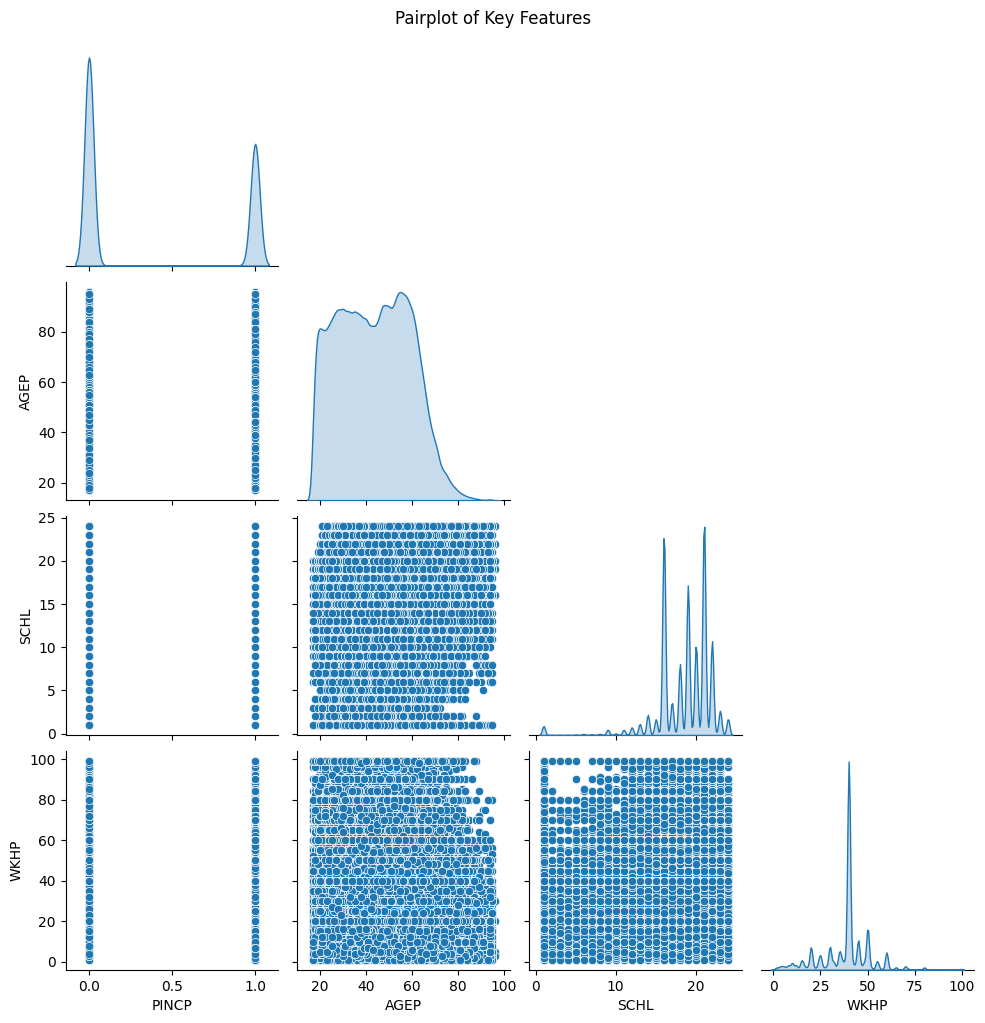

In [8]:
# Choose a subset of relevant numerical features
key_features = ['PINCP', 'AGEP', 'SCHL', 'WKHP']
sns.pairplot(data[key_features], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()


/var/folders/lp/l5rjv15x1qj14wn09rylhwwm0000gn/T/ipykernel_1190/2435043517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_income_by_gender, x='SEX', y='PINCP', palette='viridis')


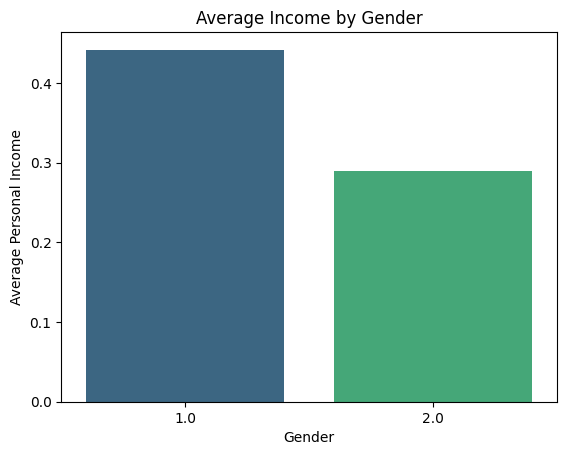

In [9]:
average_income_by_gender = data.groupby('SEX')['PINCP'].mean().reset_index()
sns.barplot(data=average_income_by_gender, x='SEX', y='PINCP', palette='viridis')
plt.title('Average Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Personal Income')
plt.show()


## Train Models

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Pre-Mitigation Model
print("\nTraining HistGradientBoostingClassifier as the pre-mitigation model...")
hg_pre = HistGradientBoostingClassifier(random_state=42)
hg_pre.fit(X_train, y_train)

# Evaluate Pre-Mitigation Model
y_pred_pre = hg_pre.predict(X_test)
print("HistGradientBoostingClassifier (Pre-Mitigation):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pre):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_pre):.4f}")



Training HistGradientBoostingClassifier as the pre-mitigation model...
HistGradientBoostingClassifier (Pre-Mitigation):
Accuracy: 0.8157
ROC-AUC: 0.7976


In [15]:
# Evaluate models
for model, name in [(dt, 'Decision Tree'), (rf, 'Random Forest')]:
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")


Decision Tree Accuracy: 0.7489
Decision Tree ROC-AUC: 0.7309
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80    210374
           1       0.66      0.66      0.66    122526

    accuracy                           0.75    332900
   macro avg       0.73      0.73      0.73    332900
weighted avg       0.75      0.75      0.75    332900

Random Forest Accuracy: 0.8110
Random Forest ROC-AUC: 0.7912
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85    210374
           1       0.76      0.72      0.74    122526

    accuracy                           0.81    332900
   macro avg       0.80      0.79      0.79    332900
weighted avg       0.81      0.81      0.81    332900



In [16]:
# Fairness Evaluation

# Helper function for demographic parity
def demographic_parity(y_pred, sensitive_attr, group_value):
    group_idx = X_test[sensitive_attr] == group_value
    return y_pred[group_idx].mean()

sensitive_attribute = 'SEX'
y_pred_rf = rf.predict(X_test)
for group_value in X_test[sensitive_attribute].unique():
    dp = demographic_parity(y_pred_rf, sensitive_attribute, group_value)
    print(f"Demographic Parity for {sensitive_attribute}={group_value}: {dp:.4f}")


Demographic Parity for SEX=2.0: 0.2546
Demographic Parity for SEX=1.0: 0.4341


## Lime Analysis, SHAP analysis(At the end of doc)

In [17]:
from lime.lime_tabular import LimeTabularExplainer

# LIME Analysis
lime_explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['<=50K', '>50K'], discretize_continuous=True)
exp = lime_explainer.explain_instance(X_test.iloc[0].values, rf.predict_proba, num_features=5)
exp.show_in_notebook()

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
# Inspect protected groups and target distribution
print("Protected Attribute Distribution (SEX):")
print(X_train['SEX'].value_counts())

print("\nIncome Distribution for Gender Groups:")
print(pd.crosstab(X_train['SEX'], y_train, rownames=['SEX'], colnames=['PINCP']))


Protected Attribute Distribution (SEX):
SEX
1.0    693452
2.0    638148
Name: count, dtype: int64

Income Distribution for Gender Groups:
PINCP       0       1
SEX                  
1.0    387068  306384
2.0    452991  185157


## COnvert to aif360 and re-weight

In [19]:
from aif360.datasets import StandardDataset
from aif360.algorithms.preprocessing import Reweighing

# Convert the dataset to AIF360 format
print("\nConverting dataset to AIF360 format with corrected group definitions...")
dataset = StandardDataset(
    pd.concat([X_train, y_train], axis=1),
    label_name='PINCP',
    favorable_classes=[1],
    protected_attribute_names=['SEX'],
    privileged_classes=[[1.0]]  # Privileged group is SEX=1.0
)

# Define unprivileged and privileged groups
unprivileged_groups = [{'SEX': 2.0}]  # Unprivileged group is SEX=2.0 (Female)
privileged_groups = [{'SEX': 1.0}]   # Privileged group is SEX=1.0 (Male)

# Check group sizes
print("\nInspecting Group Sizes After Corrected Definitions:")
privileged_count = sum(dataset.protected_attributes[:, 0] == 1.0)
unprivileged_count = sum(dataset.protected_attributes[:, 0] == 2.0)
print(f"Privileged Group Size: {privileged_count}")
print(f"Unprivileged Group Size: {unprivileged_count}")

# Apply Reweighing
print("\nApplying Reweighing algorithm...")
rw = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
rw.fit(dataset)

# Transform the dataset
transformed_dataset = rw.transform(dataset)
print("Reweighing completed successfully.")


/opt/homebrew/lib/python3.9/site-packages/inFairness/utils/ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
/opt/homebrew/lib/python3.9/site-packages/inFairness/utils/ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  monte_carlo_vect_ndcg = vmap(vect_normalized_discou


Converting dataset to AIF360 format with corrected group definitions...

Inspecting Group Sizes After Corrected Definitions:
Privileged Group Size: 693452
Unprivileged Group Size: 638148

Applying Reweighing algorithm...
Reweighing completed successfully.


## Post mitigation of HistGBClassifier:
Accuracy decreased a little but fairness increased

In [22]:
# Post-Mitigation Model with Reweighted Data
print("\nRetraining HistGradientBoostingClassifier with re-weighted data...")
hg_post = HistGradientBoostingClassifier(random_state=42)
hg_post.fit(X_train, y_train, sample_weight=transformed_dataset.instance_weights)

# Evaluate Post-Mitigation Model
y_pred_post = hg_post.predict(X_test)
print("HistGradientBoostingClassifier (Post-Mitigation):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_post):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_post):.4f}")



Retraining HistGradientBoostingClassifier with re-weighted data...
HistGradientBoostingClassifier (Post-Mitigation):
Accuracy: 0.8129
ROC-AUC: 0.7931


## Fairnesss evaluation comparison
After increased overall, bad for grp 1.0 though, can be improved by adjusting thresholds, or trying adv debiasing

In [23]:
# Fairness Evaluation Function
def calculate_metrics(y_true, y_pred, sensitive_attr, group_value):
    group_idx = X_test[sensitive_attr] == group_value
    y_true_group = y_true[group_idx]
    y_pred_group = y_pred[group_idx]
    
    tp = np.sum((y_true_group == 1) & (y_pred_group == 1))
    fp = np.sum((y_true_group == 0) & (y_pred_group == 1))
    fn = np.sum((y_true_group == 1) & (y_pred_group == 0))
    tn = np.sum((y_true_group == 0) & (y_pred_group == 0))
    
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

# Fairness Metrics: Pre-Mitigation
print("\nFairness Metrics for Pre-Mitigation Model:")
for group_value in X_test[sensitive_attribute].unique():
    tpr, fpr = calculate_metrics(y_test, y_pred_pre, sensitive_attribute, group_value)
    print(f"Group {sensitive_attribute}={group_value} (Pre-Mitigation):")
    print(f"  True Positive Rate (Equal Opportunity): {tpr:.4f}")
    print(f"  False Positive Rate (Part of Equalized Odds): {fpr:.4f}")

# Fairness Metrics: Post-Mitigation
print("\nFairness Metrics for Post-Mitigation Model:")
for group_value in X_test[sensitive_attribute].unique():
    tpr, fpr = calculate_metrics(y_test, y_pred_post, sensitive_attribute, group_value)
    print(f"Group {sensitive_attribute}={group_value} (Post-Mitigation):")
    print(f"  True Positive Rate (Equal Opportunity): {tpr:.4f}")
    print(f"  False Positive Rate (Part of Equalized Odds): {fpr:.4f}")



Fairness Metrics for Pre-Mitigation Model:
Group SEX=2.0 (Pre-Mitigation):
  True Positive Rate (Equal Opportunity): 0.6545
  False Positive Rate (Part of Equalized Odds): 0.0911
Group SEX=1.0 (Pre-Mitigation):
  True Positive Rate (Equal Opportunity): 0.7736
  False Positive Rate (Part of Equalized Odds): 0.1834

Fairness Metrics for Post-Mitigation Model:
Group SEX=2.0 (Post-Mitigation):
  True Positive Rate (Equal Opportunity): 0.7347
  False Positive Rate (Part of Equalized Odds): 0.1292
Group SEX=1.0 (Post-Mitigation):
  True Positive Rate (Equal Opportunity): 0.7077
  False Positive Rate (Part of Equalized Odds): 0.1346


In [24]:
# Function to apply group-specific thresholds
def adjusted_thresholds(probs, sex_group, thresholds):
    return (probs >= thresholds[sex_group]).astype(int)

# Group-specific thresholds (hypothetical)
thresholds = {2.0: 0.4, 1.0: 0.6}  # Adjusted

# Predict probabilities for the positive class
probs = model.predict_proba(X)[:, 1]

# Create adjusted predictions using thresholds based on the SEX column
data['adjusted_preds'] = [
    adjusted_thresholds(prob, sex, thresholds) for prob, sex in zip(probs, data['SEX'])
]

In [25]:
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate adjusted predictions
for group in [1.0, 2.0]:
    group_data = data[data['SEX'] == group]
    true_labels = group_data['PINCP'] 
    preds = group_data['adjusted_preds']
    
    tpr = sum((true_labels == 1) & (preds == 1)) / sum(true_labels == 1)  # True Positive Rate
    fpr = sum((true_labels == 0) & (preds == 1)) / sum(true_labels == 0)  # False Positive Rate
    
    print(f"Group SEX={group}:")
    print(f"  True Positive Rate: {tpr:.4f}")
    print(f"  False Positive Rate: {fpr:.4f}")


Group SEX=1.0:
  True Positive Rate: 0.9296
  False Positive Rate: 0.0253
Group SEX=2.0:
  True Positive Rate: 0.9495
  False Positive Rate: 0.0321


Testing the accuracy again after increasing fairness

In [26]:
true_labels = data['PINCP'] 

# Adjusted predictions from the threshold adjustment
adjusted_preds = data['adjusted_preds']

# Calculate accuracy
adjusted_accuracy = accuracy_score(true_labels, adjusted_preds)

print(f"Accuracy after Threshold Adjustment: {adjusted_accuracy:.4f}")

# Probabilities from the model
probs = model.predict_proba(X)[:, 1]

# Calculate ROC-AUC for adjusted predictions
adjusted_roc_auc = roc_auc_score(true_labels, adjusted_preds)

print(f"ROC-AUC after Threshold Adjustment: {adjusted_roc_auc:.4f}")

Accuracy after Threshold Adjustment: 0.9585
ROC-AUC after Threshold Adjustment: 0.9541


In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize the model
hg_tuned = HistGradientBoostingClassifier(random_state=42)

# Perform Grid Search with cross-validation
print("\nPerforming grid search for hyperparameter tuning...")
grid_search = GridSearchCV(estimator=hg_tuned, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train, sample_weight=transformed_dataset.instance_weights)

# Best parameters
print("\nBest parameters from grid search:")
print(grid_search.best_params_)

# Train the tuned model
print("\nTraining the tuned model...")
hg_tuned_best = grid_search.best_estimator_
hg_tuned_best.fit(X_train, y_train, sample_weight=transformed_dataset.instance_weights)

# Evaluate the tuned model
y_pred_tuned = hg_tuned_best.predict(X_test)
print("Tuned Model (Post-Mitigation):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_tuned):.4f}")



Performing grid search for hyperparameter tuning...

Best parameters from grid search:
{'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 300}

Training the tuned model...
Tuned Model (Post-Mitigation):
Accuracy: 0.8168
ROC-AUC: 0.7973


## Adversial Debiasing

In [32]:
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
# Convert your data to aif360's StandardDataset
dataset = StandardDataset(
    df=data, 
    label_name='PINCP', 
    favorable_classes=[1],  # Positive class
    protected_attribute_names=['SEX'],  # Sensitive feature
    privileged_classes=[[1.0]]  # Privileged group (e.g., SEX=1.0)
)

# Train-Test Split
train, test = dataset.split([0.8], shuffle=True)

# Initialize the Adversarial Debiasing Model
sess = tf.compat.v1.Session()

adv_debias_model = AdversarialDebiasing(
    privileged_groups=[{'SEX': 1.0}],  # Privileged group
    unprivileged_groups=[{'SEX': 2.0}],  # Unprivileged group
    scope_name='debiasing',
    debias=True,
    sess=sess
)

# Fit the Adversarial Debiasing model
adv_debias_model.fit(train)

# Predict using the Adversarial Debiasing model
test_preds = adv_debias_model.predict(test)

# Evaluate the model
true_labels = test.labels.ravel()
pred_labels = test_preds.labels.ravel()

adv_accuracy = accuracy_score(true_labels, pred_labels)
adv_roc_auc = roc_auc_score(true_labels, pred_labels)

print(f"Adversarial Debiasing Accuracy: {adv_accuracy:.4f}")
print(f"Adversarial Debiasing ROC-AUC: {adv_roc_auc:.4f}")
print(classification_report(true_labels, pred_labels))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2024-12-14 13:14:41.460159: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


epoch 0; iter: 0; batch classifier loss: 94.536438; batch adversarial loss: 0.689361
epoch 0; iter: 200; batch classifier loss: 16.187992; batch adversarial loss: -0.064862
epoch 0; iter: 400; batch classifier loss: 1.272187; batch adversarial loss: 0.031988
epoch 0; iter: 600; batch classifier loss: 1.590097; batch adversarial loss: 0.062548
epoch 0; iter: 800; batch classifier loss: 1.503589; batch adversarial loss: 0.006489
epoch 0; iter: 1000; batch classifier loss: 1.592605; batch adversarial loss: -0.123299
epoch 0; iter: 1200; batch classifier loss: 1.300575; batch adversarial loss: -0.356144
epoch 0; iter: 1400; batch classifier loss: 1.310576; batch adversarial loss: -0.423352
epoch 0; iter: 1600; batch classifier loss: 1.319773; batch adversarial loss: -0.511331
epoch 0; iter: 1800; batch classifier loss: 1.456580; batch adversarial loss: -0.577513
epoch 0; iter: 2000; batch classifier loss: 1.733685; batch adversarial loss: -0.812694
epoch 0; iter: 2200; batch classifier los

## Decision Tree Classifier

In [29]:
# Train-Test Split for Decision Tree Classifier
X = data.drop(columns=['PINCP']) 
y = data['PINCP'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict and Evaluate
dt_preds = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_roc_auc = roc_auc_score(y_test, dt_preds)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree ROC-AUC: {dt_roc_auc:.4f}")
print(classification_report(y_test, dt_preds))


Decision Tree Accuracy: 0.8024
Decision Tree ROC-AUC: 0.7805
              precision    recall  f1-score   support

           0       0.83      0.86      0.85    210374
           1       0.75      0.70      0.72    122526

    accuracy                           0.80    332900
   macro avg       0.79      0.78      0.78    332900
weighted avg       0.80      0.80      0.80    332900



## Using Adversial Debiasing tosee if accuracy increased

In [33]:
# Step 1: Adversarial Debiasing Predictions
debias_preds = adv_debias_model.predict(train).labels.ravel()

# Step 2: Use the Adversarial Debiased Predictions for Decision Tree

X_train_debiased = train.features  # Features from the Adversarially debiased dataset
y_train_debiased = debias_preds

# Train the Decision Tree Classifier on debiased data
decision_tree_debiased = DecisionTreeClassifier(random_state=42)
decision_tree_debiased.fit(X_train_debiased, y_train_debiased)

# Predict and Evaluate on the Test Set
X_test_debiased = test.features
y_test_debiased = test.labels.ravel()

dt_debiased_preds = decision_tree_debiased.predict(X_test_debiased)
dt_debiased_accuracy = accuracy_score(y_test_debiased, dt_debiased_preds)
dt_debiased_roc_auc = roc_auc_score(y_test_debiased, dt_debiased_preds)

print(f"Decision Tree with Adversarial Debiasing Accuracy: {dt_debiased_accuracy:.4f}")
print(f"Decision Tree with Adversarial Debiasing ROC-AUC: {dt_debiased_roc_auc:.4f}")
print(classification_report(y_test_debiased, dt_debiased_preds))


Decision Tree with Adversarial Debiasing Accuracy: 0.6423
Decision Tree with Adversarial Debiasing ROC-AUC: 0.5160
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78    209946
         1.0       0.95      0.03      0.06    122954

    accuracy                           0.64    332900
   macro avg       0.80      0.52      0.42    332900
weighted avg       0.75      0.64      0.51    332900



In [34]:
# Convert dataset to AIF360's StandardDataset
dataset = StandardDataset(
    df=data, 
    label_name='PINCP', 
    favorable_classes=[1],  # Positive class
    protected_attribute_names=['SEX'],  # Sensitive feature
    privileged_classes=[[1.0]]  # Privileged group
)

# Split into train and test sets
train, test = dataset.split([0.8], shuffle=True)

# Apply the Reweighing algorithm to compute weights
reweighing = Reweighing(
    privileged_groups=[{'SEX': 1.0}], 
    unprivileged_groups=[{'SEX': 2.0}]
)
train_reweighed = reweighing.fit_transform(train)

# Extract features, labels, and instance weights for training
X_train = train_reweighed.features
y_train = train_reweighed.labels.ravel()
weights = train_reweighed.instance_weights.ravel()

X_test = test.features
y_test = test.labels.ravel()

# Train Decision Tree Classifier with instance weights
decision_tree_reweighed = DecisionTreeClassifier(random_state=42)
decision_tree_reweighed.fit(X_train, y_train, sample_weight=weights)

# Make predictions on the test set
y_pred_reweighed = decision_tree_reweighed.predict(X_test)

# Evaluate performance
accuracy_reweighed = accuracy_score(y_test, y_pred_reweighed)
roc_auc_reweighed = roc_auc_score(y_test, y_pred_reweighed)

print(f"Reweighed Decision Tree Accuracy: {accuracy_reweighed:.4f}")
print(f"Reweighed Decision Tree ROC-AUC: {roc_auc_reweighed:.4f}")
print("Classification Report (Reweighed Decision Tree):")
print(classification_report(y_test, y_pred_reweighed))

Reweighed Decision Tree Accuracy: 0.9127
Reweighed Decision Tree ROC-AUC: 0.9064
Classification Report (Reweighed Decision Tree):
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93    209805
         1.0       0.88      0.88      0.88    123095

    accuracy                           0.91    332900
   macro avg       0.91      0.91      0.91    332900
weighted avg       0.91      0.91      0.91    332900



In [36]:
sensitive_attr_index = list(X.columns).index('SEX') 
group_values = [1.0, 2.0]  # Privileged (1.0) and Unprivileged (2.0)
def fairness_metrics_debug(y_true, y_pred, sensitive_attr, group_values):
    """Compute fairness metrics with debugging."""
    metrics = {}
    for group_value in group_values:
        # Identify indices of the current group
        group_idx = X_test[:, sensitive_attr] == group_value
        print(f"Group {group_value} indices (count): {np.sum(group_idx)}")  # Debugging
        
        if np.sum(group_idx) == 0:
            metrics[group_value] = {
                'True Positive Rate (TPR)': np.nan,
                'False Positive Rate (FPR)': np.nan,
                'Positive Prediction Rate': np.nan
            }
            continue
        
        y_true_group = y_true[group_idx]
        y_pred_group = y_pred[group_idx]

        # Calculate True Positive Rate (TPR), False Positive Rate (FPR), and Positive Prediction Rate
        tp = np.sum((y_true_group == 1) & (y_pred_group == 1))
        fn = np.sum((y_true_group == 1) & (y_pred_group == 0))
        fp = np.sum((y_true_group == 0) & (y_pred_group == 1))
        tn = np.sum((y_true_group == 0) & (y_pred_group == 0))

        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        pos_rate = np.mean(y_pred_group) if len(y_pred_group) > 0 else np.nan

        metrics[group_value] = {
            'True Positive Rate (TPR)': tpr,
            'False Positive Rate (FPR)': fpr,
            'Positive Prediction Rate': pos_rate
        }
    return metrics

# Debugging Fairness Metrics for Original Decision Tree
print("\nFairness Metrics for Original Decision Tree (Debugging):")
original_metrics_debug = fairness_metrics_debug(y_test, dt_preds, sensitive_attr_index, group_values)
for group, metrics in original_metrics_debug.items():
    print(f"Group {group}: {metrics}")

# Debugging Fairness Metrics for Reweighed Decision Tree
print("\nFairness Metrics for Reweighed Decision Tree (Debugging):")
reweighed_metrics_debug = fairness_metrics_debug(y_test, y_pred_reweighed, sensitive_attr_index, group_values)
for group, metrics in reweighed_metrics_debug.items():
    print(f"Group {group}: {metrics}")



Fairness Metrics for Original Decision Tree (Debugging):
Group 1.0 indices (count): 173125
Group 2.0 indices (count): 159775
Group 1.0: {'True Positive Rate (TPR)': 0.3405754550792719, 'False Positive Rate (FPR)': 0.3462431340035237, 'Positive Prediction Rate': 0.3437342960288809}
Group 2.0: {'True Positive Rate (TPR)': 0.34222987516142916, 'False Positive Rate (FPR)': 0.3426995543396726, 'Positive Prediction Rate': 0.3425629791894852}

Fairness Metrics for Reweighed Decision Tree (Debugging):
Group 1.0 indices (count): 173125
Group 2.0 indices (count): 159775
Group 1.0: {'True Positive Rate (TPR)': 0.892320741175703, 'False Positive Rate (FPR)': 0.08406052440667426, 'Positive Prediction Rate': 0.44184259927797837}
Group 2.0: {'True Positive Rate (TPR)': 0.8649375807145931, 'False Positive Rate (FPR)': 0.05662092397299563, 'Positive Prediction Rate': 0.29166640588327336}


**SHAP Analysis for Texas**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Filter data for Texas (State code 48)
data = pd.read_csv('/Users/darshil/Desktop/Fall2024/CNIT571/ACSIncome.csv') 
data['PINCP'] = (data['PINCP'] > 50000).astype(int)
cali_data = data[data['ST'] == 6]

# Separate features and target
X = cali_data.drop(columns=['PINCP'])  # Replace 'PINCP' with your target column
y = cali_data['PINCP']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Train the model
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

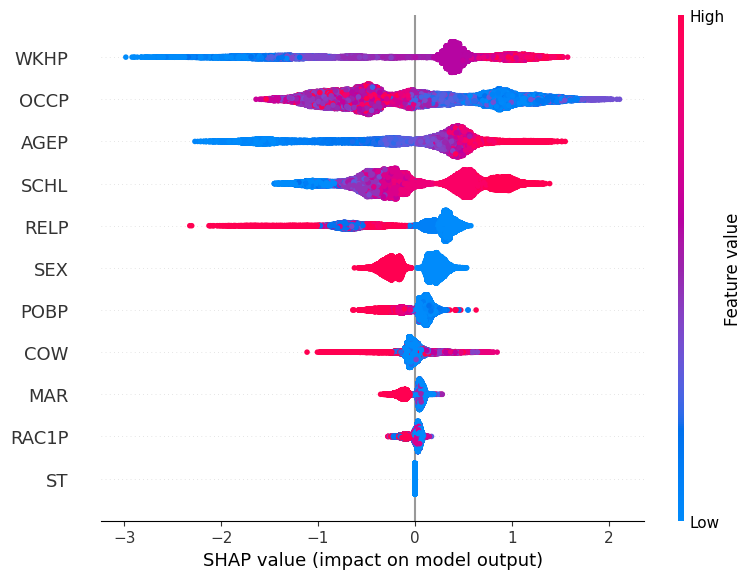

In [12]:
import shap

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)

# Force plot for a single instance (local interpretation)
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])
